# Programa de Ciencia de Datos, Aprendizaje Automático


**Tarea #3**

Estudiantes:

   - *Ricardo Montero Wille*

   - *Esteban Pérez Navarro*
   
   

**Métricas para evaluación de modelos de aprendizaje supervisado**

**Clasificación:**

- Matriz de Confusión:

        Se utiliza para evaluar la presición de un clasificador. Cada columna de la matriz representa el número de predicciones de cada clase, mientras que las filas las instancias en la clase real. Se puede apreciar los tipos de aciertos y errores que nuestro modelo tiene a la hora de pasar los datos por el modelo de aprendizaje.
        
        Para un ejemplo de falso positivo se pueden utilizar correos que se filtran como no deseados que si lo son. De falso negativo se puede utilizar de ejemplo cuando una prueba de embarazo sale negativa y claramente la persona que se la realizó si lo está.


- Métrica de Exactitud:
        
        Indica el número de elementos que se han clasificado de manera correcta en comparación con el total de elementos clasificados. 
        
    $$ Exactitud=\frac{PV + NV}{PV + NV + FP + FN} $$
    
        Se puede utilizar de ejemplo una comparación de correos no deseados que fueron clasificados correctamente en comparación del total de elementos clasificados.


- Métrica de Sensibilidad:

        Logra mostrar la cantidad de verdaderos positivos que el modelo logró clasificar en función del número total de valores positivos.
        
    $$ Sensibilidad=\frac{PV}{PV + FN} $$
    
        Se puede utilizar de ejemplo una comparación de cajas que fueron detectadas por el sistema de una bodega que fueron clasificadas correctamente en comparación del total de valores que el modelo predijo que iban a serlo.


- Métrica de Precisión:

        Compara el total de verdaderos positivos que realmente lo son contra el total de valores positivos que el modelo predijo.

    $$ Precision=\frac{PV}{PV + FP} $$
    
        De ejemplo podemos ver la cantidad de ordenes que fueron compras predecidas por un sistema contra el total de ordenes que el modelo predijo que lo iban a ser.
    

- Puntuación F1:

        Utiliza una combinación entre la métrica de precisión y Sensibilidad y sirve de compromiso entre ambas.
        
    $$ F1=\frac{Precision  *  Sensibilidad}{Precision + Sensibilidad} $$        



**Regresión:**

- Error medio absoluto:

        Es el valor medio de la diferencias absoluta entre el valor real y el valor predicho.
        
    $$ EMA = \frac{1}{n}\sum_{t=1}^{n}\left|e_{t}\right|$$
        
$$ e_{t} = real_{t} - predicho_{t} $$


        Un ejemplo puede ser cuando se comparan datos originales de series de tiempo de una carrera contra los datos de las series de tiempo que fueron pronosticadas. Al aplicar la fórmula, da un valor medio entre ambas.


- Error cuadrático medio:

        Calcula el valor medio de la diferencia al cuadrado entre el valor real y el predicho para todos los puntos de datos. Los valores relacionados se elevan al cuadrado por lo que los valores negativos no se compensan con los positivos. El impacto de los errores es mayor debido a como es esta métrica. Cuanto menor sea el ECM, las predicciones serán más acertadas. Si el ECM es 1, ese sería el punto óptimo para que el pronóstico sea preciso.
        
    $$ ECM = \frac{1}{n}\sum_{t=1}^{n}e_{t}^2$$
        
$$ e_{t} = real_{t} - predicho_{t} $$

        Un ejemplo sería cuando en un nodo hay 4 muestras cuyas etiquetas son 2, 4, 5 y 8, el valor medio es de 4.75 y al calcular el ECM se obtiene 4.6875


- Raíz del error cuadrático medio:

        Es la raíz cuadrada del ECM. Utiliza valores absolutos más pequeños lo que hace que sea más útil para cálculos informáticos.
        
    $$ RECM = \sqrt{\frac{1}{n}\sum_{t=1}^{n}e_{t}^2}$$
        
$$ e_{t} = real_{t} - predicho_{t} $$

        Un ejemplo es cuando se compara un punto de elevación predicho (valor predicho) con una medición topográfica del terreno (valor real). El ECM toma la diferencia para cada valor predicho y valor medio. Después se divide la suma de los valores por elnúmero de observaciones y obtenemos el valor de su raíz.

**A continuación se presenta el desarrollo del problema:**

Primero se importan las librerías.

In [1]:
# Imports para tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from numpy import absolute
from numpy import arange

# Imports para graficación
# ==============================================================================

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import sklearn.metrics as skm

# Imports para pre-procesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import \
    StandardScaler, PolynomialFeatures
from sklearn.model_selection import \
    KFold, RepeatedKFold, GridSearchCV, \
    cross_validate, train_test_split
from sklearn.metrics import \
    r2_score, get_scorer
from sklearn import metrics 
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

#Esta línea se utiliza para evitar algunas advertencias que panda tiene
pd.options.mode.chained_assignment = None  # default='warn'

Seguidamente procedemos a leer el archivo y visualizamos las primeras 10 líneas. En este caso, vamos a utilizar un archivo que contiene datos relativos a una página de ventas digitales entre clientes, es decir, C2C (Customer To Customer). En esta, los usuarios pueden comprar y vender productos, y se cuenta con diferentes métricas para cada usuario, como su cantidad de seguidores, de seguidos, los productos listados y gustados, su país e idioma, entre otros. En este caso, se va a realizar un análisis basado en predecir cuántos productos compra un usuario basado en el resto de sus atributos, es decir, se trata de un problema de regresión.

In [2]:
archivo = "ecommerce2.csv"
ecommerce= pd.read_csv(archivo)
ecommerce.head(10)

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,-1.369440e+18,user,France,fr,31,8,0,1,1,0.0,...,mrs,True,False,True,False,127,3205,106.83,8.9,fr
1,-6.589090e+18,user,Etats-Unis,en,3,9,1,0,0,0.0,...,mr,False,False,False,True,26,3205,106.83,8.9,us
2,-9.372890e+17,user,Suède,en,5,8,0,0,0,0.0,...,mr,False,False,False,True,543,3205,106.83,8.9,se
3,7.144190e+18,user,Canada,en,4,10,1,0,0,0.0,...,mrs,True,True,False,True,208,3205,106.83,8.9,ca
4,4.994270e+18,user,Royaume-Uni,en,3,8,0,0,0,0.0,...,mrs,False,False,False,True,27,3205,106.83,8.9,gb
5,4.907050e+18,user,Etats-Unis,en,28,29,0,0,0,0.0,...,mr,True,False,True,False,15,3205,106.83,8.9,us
6,2.888730e+16,user,Allemagne,de,5,8,3,0,0,0.0,...,mrs,True,False,True,True,338,3205,106.83,8.9,de
7,-6.445120e+18,user,Japon,en,3,8,12,0,0,0.0,...,mr,False,False,False,True,29,3205,106.83,8.9,jp
8,-2.217320e+18,user,Danemark,en,7,8,0,0,0,0.0,...,mr,True,True,False,True,50,3205,106.83,8.9,dk
9,-3.356570e+18,user,Etats-Unis,en,4,9,0,0,0,0.0,...,mr,False,False,False,True,151,3205,106.83,8.9,us


**Iniciando con el tratamiento y análisis exploratorio de los datos**

Reemplazamos los valores de masculino y femenino por 1 y 0 para poder ser utilizados por el programa.

In [3]:
ecommerce.replace(to_replace='F', value = 1, inplace = True)
ecommerce.replace(to_replace='M', value = 0, inplace = True)

Procedemos a cambiar los códigos de paises y de idiomas a una categoría numeral para poder ser trabajado, usando label encoding. Para lograrlo, primeros pasamos las columnas a tipo categoría, para luego aplciar la función cad.codes, que las etiqueta.  

In [4]:
ecommerce["countryCode"] = ecommerce["countryCode"].astype('category')

ecommerce["country"] = ecommerce["countryCode"].cat.codes

ecommerce["language"] = ecommerce["language"].astype('category')

ecommerce["languageCat"] = ecommerce["language"].cat.codes

ecommerce.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode,languageCat
0,-1.369440e+18,user,19,fr,31,8,0,1,1,0.0,...,True,False,True,False,127,3205,106.83,8.9,fr,3
1,-6.589090e+18,user,61,en,3,9,1,0,0,0.0,...,False,False,False,True,26,3205,106.83,8.9,us,1
2,-9.372890e+17,user,54,en,5,8,0,0,0,0.0,...,False,False,False,True,543,3205,106.83,8.9,se,1
3,7.144190e+18,user,7,en,4,10,1,0,0,0.0,...,True,True,False,True,208,3205,106.83,8.9,ca,1
4,4.994270e+18,user,20,en,3,8,0,0,0,0.0,...,False,False,False,True,27,3205,106.83,8.9,gb,1


Seguidamente descartamos las columnas que no van a ser utilizadas por el modelo, por ser poco importantes según la investigación previa realizada (criterio experto) o que fueron reemplazadas por una nueva al hacer el label encoding. Para esto, se procede a usar la función drop.

In [5]:
porEliminar = []
#Removemos columnas que no aportan a los modelos
porEliminar += ["identifierHash", "type", "civilityTitle", "countryCode", "language","hasAnyApp","hasAndroidApp","hasIosApp","hasProfilePicture"]

#Removemos columnas duplicadas
porEliminar += ["seniority", "seniorityAsYears", "civilityGenderId"]

#Se remueven las columnas
ecommerce.drop(porEliminar, axis=1, errors='ignore', inplace=True)

A continuación, se consulta el tipo de dato de cada columna, con el objetivo de determinar que son los necesarios para hacer un análisis cuantitativo. 

In [6]:
ecommerce.dtypes

country                   int8
socialNbFollowers        int64
socialNbFollows          int64
socialProductsLiked      int64
productsListed           int64
productsSold             int64
productsPassRate       float64
productsWished           int64
productsBought           int64
gender                   int64
daysSinceLastLogin       int64
seniorityAsMonths      float64
languageCat               int8
dtype: object

Como parte de la limpieza de datos, se verifica que no existan nulos en el set, usando la función isna().

In [7]:
ecommerce.isna().sum()

country                0
socialNbFollowers      0
socialNbFollows        0
socialProductsLiked    0
productsListed         0
productsSold           0
productsPassRate       0
productsWished         0
productsBought         0
gender                 0
daysSinceLastLogin     0
seniorityAsMonths      0
languageCat            0
dtype: int64

Se procede a representar las correlaciones entre las diversas variables usando un mapa de calor. 

<function matplotlib.pyplot.show(close=None, block=None)>

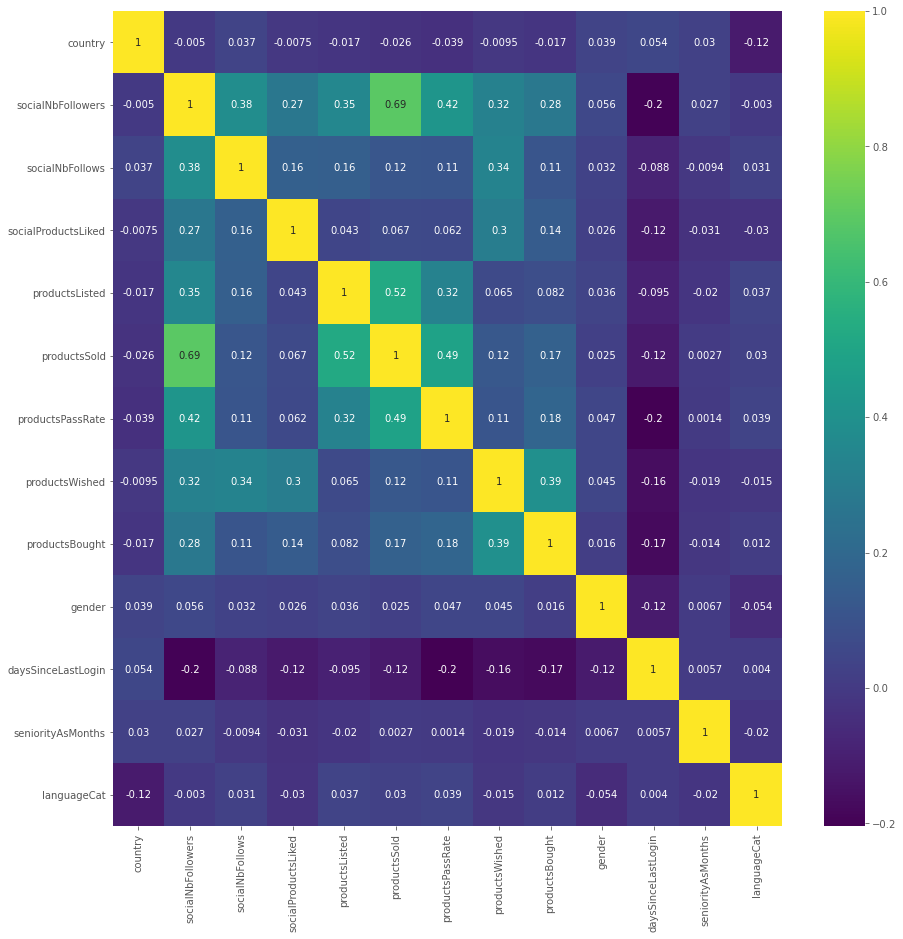

In [8]:
plt.figure(figsize=(15,15))

chart = sns.heatmap(ecommerce.corr(), annot = True, cmap = 'viridis')
plt.xticks(rotation=90)
plt.show

Acá, se denota que la columna que vamos a utilizar como y, que corresponde a los productos comprados, tiene una mayor correlación con las variables de seguidos, seguidos, productos gustados, productos vendidos, tasa de pase de productos y productos deseados. 

**Utilización de modelos para regresión**

Procedemos a dividir los datos en los regresores y la columna por predecir. 

In [9]:
X = ecommerce.drop(columns='productsBought')
y = ecommerce['productsBought']


Seguidamente, se escalan los datos de X, para eliminar los posibles pesos que pueda tener una variable sobre otra por tema de escala.

In [10]:

escalado = StandardScaler()
X_escalado = escalado.fit_transform(X)
X_escalado = pd.DataFrame(data = X_escalado, columns = X.columns)


A continuación, se dividen los datos en entrenamiento y testeo, usando 70% para el entrenamiento y 30% para el testeo, lo cual está en el rango que la literatura recomienda.

In [11]:

X_train, X_test, y_train, y_test = train_test_split(X, y.values.reshape(-1,1), train_size= 0.7, random_state = 1234, shuffle = True)

# Modelo Lasso

Definimos el modelo a utilizar. En este caso utilizaremos Lasso. Primero se define el modelo con un alfa de 1, el cual es la máxima penalización que se le puede dar al modelo. Es importante recordar que si el alfa fuera de 0, básicamente se está realizando una regresión lineal. 

In [12]:
modelo = Lasso(alpha=1.0)
rkf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

 Se corre el modelo, usando la función de score de la validación cruzada y un error medio absoluto, lo cual se almacena en la variable resultados. Se utiliza el valor absoluto para que los resultados sean positivos.

In [13]:
resultados = cross_val_score(modelo, X, y, scoring='neg_mean_absolute_error', cv=rkf, n_jobs=-1)

resultados = absolute(resultados)
print('Media del EMA: %.3f (%.3f)' % (mean(resultados), std(resultados)))

Media del EMA: 2.450 (0.324)


Se denota que la distancia entre los valores predichos y los reales tiene una media de 2.450, con una desviación estándar de 0.324. Considerando que en la columna de los productos comprados los valores rondan entre el 1 y el 10, este es un error alto.

El modelo de Lasso permite hacer un tuneo del alfa, el cual es su hiperparámetro. Para lograrlo, definimos la cuadrícula del modelo seguidamente por su busqueda, la cuál realizamos y se resume. Para hacer este grid search, definimos el espacio de los alfa de 0 a 1, con aumentos de 0.01 en cada momento. 

Usando la función GridSearchCV, procedemos a correr la búsqueda. 

Finalmente, se evalúa el error medio absoluto de nuevo, para compararlo con la penalización que se hizo originalmente de 1. 

In [14]:
modelo = Lasso()
rkf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
cuadr = dict()
cuadr['alpha'] = arange(0, 1, 0.01)

busqueda = GridSearchCV(modelo, cuadr, scoring='neg_mean_absolute_error', cv=rkf, n_jobs=-1)

resultado = busqueda.fit(X, y)

print('EMA: %.3f' % resultado.best_score_)
print('Configuración: %s' % resultado.best_params_)

EMA: -2.450
Configuración: {'alpha': 0.99}


Al evaluar el error y el alfa, es posible observar que son prácticamente iguales que los que se corrieron originalmente. Esto ocurre porque la búsqueda cuadrícula definió que el mejor alfa se ajusta a estos datos es de 0.99, que es prácticamente la penalización entera de 1, resultando en el mismo error que se tenía al inicio.

# Modelo Ridge

Definimos el modelo a utilizar. En este caso utilizaremos Ridge, usando un alfa de 1, como penalización máxima. 

In [15]:
modelo = Ridge(alpha=1.0)

rkf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)


Se corre el modelo, usando la función de score de la validación cruzada y un error medio absoluto, lo cual se almacena en la variable resultados. Se utiliza el valor absoluto para que los resultados sean positivos.

In [16]:
resultados = cross_val_score(modelo, X, y, scoring='neg_mean_absolute_error', cv=rkf, n_jobs=-1)

resultados = absolute(resultados)
print('Media del EMA: %.3f (%.3f)' % (mean(resultados), std(resultados)))

Media del EMA: 2.494 (0.320)


Se observa que el modelo da un error absoluto medio de 2.494 con una desviación estándar de 0.320. Como se menciono antes, considerando que la columna de productos comprados va de 1 a 10, es un error bastante alto.

Seguidamente, se procede a tunear el hiperparámetro de alfa para mejorar el desempeño del modelo. Para esto, se define la cuadrícula que busca de 0 a 1, en intervalos de 0.01. Luego, se aplica la función GridSearchCV con el modelo de Ridge y basado en el error absoluto medio. 

In [17]:
modelo = Ridge()
rkf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
cuadr = dict()
cuadr['alpha'] = arange(0, 1, 0.01)

busqueda = GridSearchCV(modelo, cuadr, scoring='neg_mean_absolute_error', cv=rkf, n_jobs=-1)

resultado = busqueda.fit(X, y)

print('EMA: %.3f' % resultado.best_score_)
print('Configuración: %s' % resultado.best_params_)

EMA: -2.494
Configuración: {'alpha': 0.99}


De nuevo, se observa que el error es prácticamente igual del original, porque el gird search determinó que el mejor alfa es 0.99 que corresponde prácticamente a la penalización completa.

**Modelos Ridge y Lassso eliminando variables sin correlación con la variable Y**

Usando el mapa de calor de la etapa de exploración, procedemos a eliminar las variables que tenían un coeficiente bajo con la variable por predecir. En este caso, se eliminan 6 variables, y se visualizan 5 filas al azar del dataset para determinar que se realizó correctamente.

In [18]:
porEliminar = []
# se quitan columnas que no aportan al modelo
porEliminar += ["country","socialNbFollows","gender","daysSinceLastLogin","seniorityAsMonths","languageCat"]


ecommerce.drop(porEliminar, axis=1, errors='ignore', inplace=True)

ecommerce.sample(5)

,socialNbFollowers,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought
2434,6,116,1,0,0.0,153,25
2847,5,0,0,0,0.0,0,1
3680,18,11,0,7,100.0,3,5
2745,3,0,0,0,0.0,0,1
345,7,0,0,0,0.0,12,2


Se vuelven a dividir los datos en X y Y y a escalarlos. 

In [19]:
X = ecommerce.drop(columns='productsBought')
y = ecommerce['productsBought']

sc = StandardScaler()
X_escalado = sc.fit_transform(X)
X_escalado = pd.DataFrame(data = X_escalado, columns = X.columns)


Se vuelve a dividir en las variables de entrenamiento y de testeo, con un tamaño de entrenamiento del 70%.

In [20]:

X_train, X_test, y_train, y_test = train_test_split(X, y.values.reshape(-1,1), train_size= 0.7, random_state = 1234, shuffle = True)

En los siguientes dos bloques, básicamente se vuelve a correr el modelo de Lasso y de Ridge usando el GridSearch, pero solamente con las variables que tenían más correlación con la variable de respuesta. 

In [21]:
modelo = Lasso()
rkf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
cuadr = dict()
cuadr['alpha'] = arange(0, 1, 0.01)

busqueda = GridSearchCV(modelo, cuadr, scoring='neg_mean_absolute_error', cv=rkf, n_jobs=-1)

resultadosLasso = busqueda.fit(X, y)

print('EMA: %.3f' % resultadosLasso.best_score_)
print('Configuración: %s' % resultadosLasso.best_params_)

EMA: -2.499
Configuración: {'alpha': 0.9}


In [22]:
modelo = Ridge()
rkf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
cuadr = dict()
cuadr['alpha'] = arange(0, 1, 0.01)

busqueda = GridSearchCV(modelo, cuadr, scoring='neg_mean_absolute_error', cv=rkf, n_jobs=-1)

resultadosRidge = busqueda.fit(X, y)

print('EMA: %.3f' % resultadosRidge.best_score_)
print('Configuración: %s' % resultadosRidge.best_params_)

EMA: -2.504
Configuración: {'alpha': 0.99}


Es claro que el error y el alfa se mantienen en ambos modelos, con respecto a los que se obtuvieron previos a la eliminación de variables. Esto indica que las variables no aportaban nada de variabilidad al modelo, siendo insignificantes para el análisis. Por esto, se procede en los demás modelos sin esas variables. 

# Regresión lineal múltiple


Primero se define el modelo de regresión y se procede a correr usando el .fit, con los datos de entrenamiento.

In [23]:
modelorl = LinearRegression()
resultadosRL = modelorl.fit(X = X_train, y = y_train)

Se imprime la información del modelo, como la intersección y los coeficientes para cada una de las variables. Además, se imprime el coeficiente de determinación R2.

In [24]:
print("Intercección:", modelorl.intercept_)
print("Coeficiente:", list(zip(X.columns, modelorl.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelorl.score(X, y))

Intercección: [0.84375256]
Coeficiente: [('socialNbFollowers', 0.2856418102943932), ('socialProductsLiked', 0.005337748562928037), ('productsListed', -0.03893016830473671), ('productsSold', 0.023359863095312485), ('productsPassRate', 0.03461040964480548), ('productsWished', 0.01613458463739295)]
Coeficiente de determinación R^2: 0.14264316621947892


Para evaluar el error cuadrático medio, se procede a realizar las predicciones basados en los x de testeo. A esto, se le calcula el error entre los valores predichos y los valores originales de testeo.

In [25]:
predicciones = modelorl.predict(X = X_test)

recm = mean_squared_error(y_true = y_test, y_pred = predicciones, squared = False)

print(f"El error RECM de test es: {recm}")

El error RECM de test es: 13.0567875373638


Se denota que en este caso, el error cuadrático es de 6.09.

# Ensemble con Random Forest


Los métodos de ensemble usan múltiples algoritmos de aprendizaje de forma combinada para obtener un mejor rendimiento predictivo que el que se obtendría de los algoritmos de forma individual. Estos algoritmos usan lo denominado bagging o boosting para unir los algoritmos más simples, y algunos ejemplos son el XGBoost, Random Forest y AdaBoost. 

El algoritmo Random Forest usa el bagging, en donde los algoritmos simples son usados en paralelo para aprovechar la independiente entre ellos, ya que el error se puede reducir al promediar las salidas de los modelos simples. Por otro lado, en los algoritmos de boosting, se usan los modelos simples secuencialmente, para aprovechar la dependencia entre estos. El rendimiento general se puede mejorar porque un modelo posterior le puede dar más importancia a los errores cometidos por un modelo previo.

Las predicciones de cada modelo simple se combinan por medio de una votación para problemas de clasificación o por suma ponderada para regresión. 

Algunas características son:

- Requieren más computación para la evaluación de su predicción, es decir, requieren muchos cálculos adicionales.
- Usualmente presentan mejores resultados que los algoritmos más simples.
- Usan el bagging o boosting para unir los algoritmos simples.
- La mayor diferencia entre bagging y boosting es que en boosting los algoritmos no se entrenan independientemente, sino que se ponderan según los errores de los anteriores. 


Siguiendo, se utiliza Random Forest como el método de ensemble que no se vio en clase, principalmente porque en clase se vio solamente como un método de clasificación, pero en esta práctica se usa para regresión.

Como siempre, se dividen los datos en entrenamiento y testeo primero.

In [26]:
X_train, X_test, y_train, y_test = train_test_split( ecommerce.drop(columns = "productsBought"), ecommerce['productsBought'], random_state = 123)

Se crea el modelo, usando 10 árboles como el número de estimadores, un criterio de scoring de error cuadrático medio, y un máximo de atributos automático.

In [27]:
modelo = RandomForestRegressor(n_estimators = 10, criterion = 'mse', max_depth = None, max_features = 'auto', oob_score = False, n_jobs = -1, random_state = 123)

modelo.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=123)

Una vez creado el modelo, se procede a predecir usando el x de testeo y comparándolo con el y de testeo usando un error cuadrático medio. Esto regresa un error de 8.6, mayor que el que se observó en los modelos pasados.

In [28]:
predicciones = modelo.predict(X = X_test)

recm = mean_squared_error( y_true  = y_test, y_pred  = predicciones, squared = False)
print(f"El error RECM de test es: {recm}")

El error RECM de test es: 8.604948172106152


Realizamos una validación empleando el out of bag error: Definimos valores evaluados, realizamos un bucle para entrenar el modelo con cada valor de estimadores y extraer su error de entrenamiento y out of bag. 

In [29]:
resultados_train = []
resultados_oob   = []

rango_estimador = range(1, 150, 5)

for n_estimators in rango_estimador:
    modelo = RandomForestRegressor(n_estimators = n_estimators, criterion = 'mse', max_depth = None, max_features = 'auto', oob_score = True, n_jobs = -1, random_state = 123)
    modelo.fit(X_train, y_train)
    resultados_train.append(modelo.score(X_train, y_train))
    resultados_oob.append(modelo.oob_score_)

D:\Users\ricky\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Users\ricky\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Users\ricky\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Users\ricky\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not hav

Definimos un gráfico con la evolución de los errores con respecto al número de estimadores. 

Valor óptimo de estimadores_n: 131


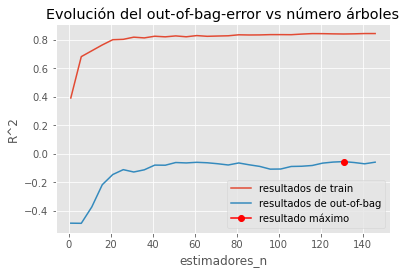

In [30]:
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(rango_estimador, resultados_train, label="resultados de train")
ax.plot(rango_estimador, resultados_oob, label="resultados de out-of-bag")
ax.plot(rango_estimador[np.argmax(resultados_oob)], max(resultados_oob), marker='o', color = "red", label="resultado máximo")
ax.set_ylabel("R^2")
ax.set_xlabel("estimadores_n")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
plt.legend();
print(f"Valor óptimo de estimadores_n: {rango_estimador[np.argmax(resultados_oob)]}")

Mediante la gráfica, queda claro que el mejor número de estimadores (árboles) es 131. 

Ahora, queremos determinar el mejor número de features. Para esto, realizamos una validación empleando el out of bag error: Definimos valores evaluados, realizamos un bucle para entrenar el modelo con cada valor de estimadores y extraer su error de entrenamiento y out of bag.

In [31]:
resultados_train = []
resultados_oob   = []

rango_carac_max = range(1, X_train.shape[1] + 1, 1)

for max_features in rango_carac_max:
    modelo = RandomForestRegressor(n_estimators = 100, criterion    = 'mse', max_depth    = None, max_features = max_features, oob_score    = True, n_jobs       = -1, random_state = 123)
    modelo.fit(X_train, y_train)
    resultados_train.append(modelo.score(X_train, y_train))
    resultados_oob.append(modelo.oob_score_)


Definimos un gráfico con la evolución de los errores

Valor óptimo de max_features: 2


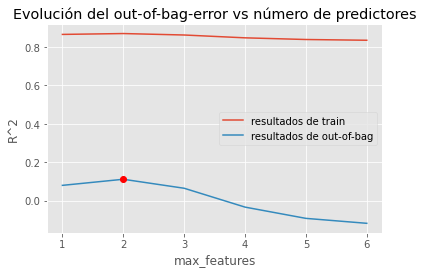

In [32]:
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(rango_carac_max, resultados_train, label="resultados de train")
ax.plot(rango_carac_max, resultados_oob, label="resultados de out-of-bag")
ax.plot(rango_carac_max[np.argmax(resultados_oob)], max(resultados_oob), marker='o', color = "red")
ax.set_ylabel("R^2")
ax.set_xlabel("max_features")
ax.set_title("Evolución del out-of-bag-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {rango_carac_max[np.argmax(resultados_oob)]}")

Queda claro que el mejor número de features para el modelo es 2. 

Nuevamente se plantea y se corre el modelo de Random Forest, pero usando 131 árboles como estimadores, y 2 features, según el tuneo de hiperparámetros realizado. 

In [33]:
modelo = RandomForestRegressor(n_estimators = 131, criterion    = 'mse', max_depth    = None, max_features = 2, oob_score    = False, n_jobs       = -1, random_state = 123)

modelo.fit(X_train, y_train)

RandomForestRegressor(max_features=2, n_estimators=131, n_jobs=-1,
                      random_state=123)

Realizamos un error de test del modelo tuneado, usando como error el cuadrático medio.

In [34]:
predicciones = modelo.predict(X = X_test)

recm = mean_squared_error(y_true  = y_test,y_pred  = predicciones,squared = False)
print(f"El error RECM de test es: {recm}")

El error RECM de test es: 7.445893396728748


Se denota que mediante el tuneo de los hiperparámetros de árboles y de features, se logra bajar el error de 8.6 a 7.4, lo cual implica que sí se logró una mejoría en el modelo alcanzado.

# Definición de métricas de rendimiento: 

Procedemos a definir las funciones para las métricas de rendimiento por regresión.



- Error medio absoluto:

In [35]:
def ema(pred, true):
    return skm.mean_absolute_error(true, pred)

- Error cuadrático medio::

In [36]:
def ecm(pred, true):
    return skm.mean_squared_error(true, pred, squared = True)

- Raíz del error cuadrático medio:

In [37]:
def recm(pred, true):
    return skm.mean_squared_error(true, pred, squared = False)

- Raíz del error cuadrático medio:

In [38]:
def r2(pred,true): 
    return r2_score(true, pred,
        multioutput='variance_weighted')

# Aplicación de métricas de rendimiento:

Procedemos a definir las funciones para las métricas de rendimiento por regresión.

Para cada modelo estudiado se evalúan las métricas de error medio absoluto, error cuadrático medio, raíz del error cuadrático medio y coeficiente de determinación R2. 

En cada uno de los modelos se crean dos variables, una que almacena el valor real (Y de testeo) y el valor predicho (Y predicha, usando las X de testeo)

**Modelo de Regresión Lineal:**

In [39]:
pred = resultadosRL.predict(X_test)
true = y_test.tolist()

Error Medio Absoluto:

In [40]:
ema(pred, true)

2.2487816748023004

Error Cuadrático Medio:

In [41]:
ecm(pred, true)

37.16566616161663

Raíz del Error Cuadrático Medio:

In [42]:
recm(pred, true)

6.096364995767283

Coeficiente de determinación R2:

In [43]:
r2(pred,true)

0.26160716950278473

**Modelo Lasso:**

In [44]:
pred = resultadosLasso.predict(X_test)
true = y_test.tolist()

Error Medio Absoluto:

In [45]:
ema(pred, true)

2.301107376686692

Error Cuadrático Medio:

In [46]:
ecm(pred, true)

38.95133889429995

Raíz del Error Cuadrático Medio:

In [47]:
recm(pred, true)

6.241100775848756

Coeficiente de determinación R2:

In [48]:
r2(pred,true)

0.22613012631744112

**Modelo Ridge:**

In [49]:
pred = resultadosRidge.predict(X_test)
true = y_test.tolist()

Error Medio Absoluto:

In [50]:
ema(pred, true)

2.29761025705417

Error Cuadrático Medio:

In [51]:
ecm(pred, true)

38.987994632436084

Raíz del Error Cuadrático Medio:

In [52]:
recm(pred, true)

6.244036725743698

Coeficiente de determinación R2:

In [53]:
r2(pred,true)

0.22540186453629596

**Random Forest:**

In [54]:
pred = modelo.predict(X_test)
true = y_test.tolist()

Error Medio Absoluto:

In [55]:
ema(pred, true)

2.3762251125353693

Error Cuadrático Medio:

In [56]:
ecm(pred, true)

55.44132847544878

Raíz del Error Cuadrático Medio:

In [57]:
recm(pred, true)

7.445893396728748

Coeficiente de determinación R2:

In [58]:
r2(pred,true)

-0.10148649782016417

**Análisis final de métricas**

Cuando se compara el error medio absoluto entre los diferentes modelos, queda claro que todos rondan entre 2.24 y 2.37, por lo cual es una métrica que se asemeja mucho entre ellos. Este indicador da una buena noción del desempeño de los modelos, en donde ya se puede ir observando que es alto en comparación con los valores de la variable por predecir, que como se mencionó anteriormente va entre 1 y 10.

Con respecto al error cuadrático medio, el comportamiento se repite, con los modelos de regresión, Lasso y Ridge ronando los 39 y el random forest 55. Lo mismo ocurre con la raíz del error, en donde los primeros tres tienen un valor de 6 y el Random Forest de 7. Esto se puede explicar porque son modelos que utilizan un principio similar, con la diferencia de la penalización por el alfa. 

Finalmente, el R2 indica que el mejor modelo es el de regresión lineal, con un coeficiente de 0.26, y el peor sería el Random Forest, con 0.10. 

Queda claro que los modelos se desempeñan de manera deficiente con el dataset seleccionado. 

Como conclusión, este bajo desempeño puede darse por dos razones: 

- El dataset era pequeño, y tenía alrededor de 5000 registros. Esto ocasiona que el modelo no sea tan robusto en su entrenamiento, causando menor capacidad de predicción.

- Muchos registros del modelo eran 0: En muchas ocasiones, usuarios tenían 0 en sus diferentes variables; por ejemplo, no tenían seguidores, seguidos, publicaciones con like, entre otros. Esto no es suficiente razón como para eliminar esos registros, porque el dato se tiene, es simplemente que es 0. El 0, al ser un valor tan neutro, no añade la variabilidad que necesita el modelo para aumentar su capacidad de predicción.